In [53]:
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [54]:
df_results = pd.read_csv("results.csv")

df_results["graph_filename"] = df_results["graph_filename"].map(lambda k: k.split('.')[0])

df_results.head(5)

,graph_filename,algorithm_name,num_vertices,numEdges,color_count,duration_ns,duration_sec
0,myciel3,chromaticNumber,11.0,20.0,4.0,5.084931e+04,0.000051
1,myciel4,chromaticNumber,23.0,71.0,5.0,6.661371e+08,0.666137
2,queen5_5,chromaticNumber,25.0,320.0,5.0,5.994854e+04,0.000060
3,queen6_6,chromaticNumber,36.0,580.0,7.0,3.243345e+08,0.324335
4,queen7_7,chromaticNumber,49.0,952.0,7.0,8.013429e+06,0.008013


In [90]:
df_resultado = df_results.rename(columns={
    "graph_filename": "grafo",
    "num_vertices": "número de vértices",
    "numEdges": "número de arestas",
    "algorithm_name": "algoritmo",
    "color_count": "cores",
    "duration_sec": "duração (segundos)",
})
df_resultado = df_resultado.drop(["duration_ns"], axis=1)
df_resultado.to_csv("df_resultado.csv", index=False)
df2 = df_resultado.pivot_table(index='grafo', values=["cores", "duração (segundos)"], columns=["algoritmo"],aggfunc='first').sort_values("grafo")
df2.columns = [' '.join(col).strip() for col in df2.columns.values]
df2

,cores chromaticNumber,cores dsatur,cores first_fit,duração (segundos) chromaticNumber,duração (segundos) dsatur,duração (segundos) first_fit
grafo,,,,,,
anna,NaN,11.0,12.0,NaN,0.002444,0.000139
david,NaN,11.0,12.0,NaN,0.001820,0.000111
fpsol2,NaN,65.0,65.0,NaN,0.032998,0.001579
games120,NaN,9.0,9.0,NaN,0.002748,0.000180
homer,NaN,13.0,15.0,NaN,0.009336,0.000466
huck,NaN,11.0,11.0,NaN,0.001307,0.000087
inithx,NaN,54.0,54.0,NaN,0.055912,0.002553
jean,NaN,10.0,10.0,NaN,0.001174,0.000076
latin_square_10,NaN,130.0,213.0,NaN,0.824502,0.036444


In [4]:
has_chromatic_graph = df_results[df_results['algorithm_name'] == "chromaticNumber"]['graph_filename']
df_results_chromatic = df_results[df_results["graph_filename"].map(lambda k: k in has_chromatic_graph.values)]
df_results_chromatic

,graph_filename,algorithm_name,num_vertices,numEdges,color_count,duration_ns,duration_sec
0,myciel3,chromaticNumber,11.0,20.0,4.0,5.084931e+04,0.000051
1,myciel4,chromaticNumber,23.0,71.0,5.0,6.661371e+08,0.666137
2,queen5_5,chromaticNumber,25.0,320.0,5.0,5.994854e+04,0.000060
3,queen6_6,chromaticNumber,36.0,580.0,7.0,3.243345e+08,0.324335
4,queen7_7,chromaticNumber,49.0,952.0,7.0,8.013429e+06,0.008013
39,myciel3,dsatur,11.0,20.0,4.0,6.609723e+04,0.000066
40,myciel4,dsatur,23.0,71.0,5.0,1.784076e+05,0.000178
51,queen5_5,dsatur,25.0,320.0,5.0,5.896405e+05,0.000590
52,queen6_6,dsatur,36.0,580.0,9.0,1.102292e+06,0.001102
53,queen7_7,dsatur,49.0,952.0,10.0,1.816433e+06,0.001816


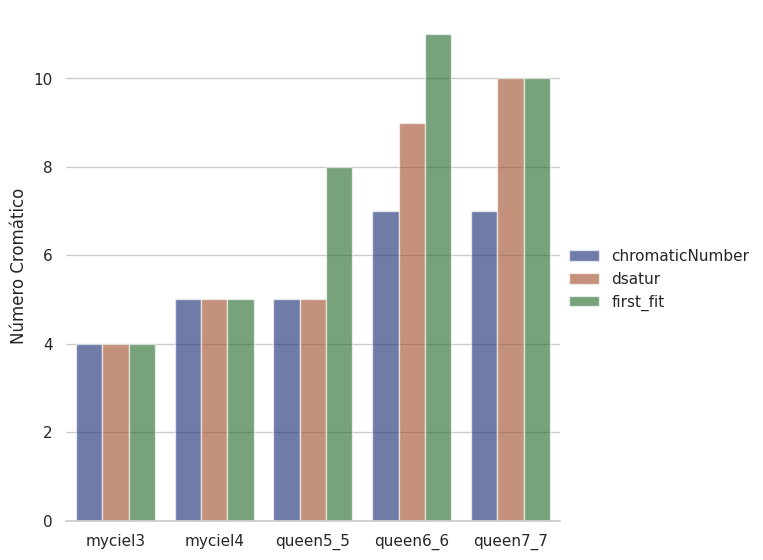

In [5]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df_results_chromatic, kind="bar",
    x="graph_filename", y="color_count", hue="algorithm_name",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Número Cromático")
g.legend.set_title("")

In [6]:
df_results

,graph_filename,algorithm_name,num_vertices,numEdges,color_count,duration_ns,duration_sec
0,myciel3,chromaticNumber,11.0,20.0,4.0,5.084931e+04,0.000051
1,myciel4,chromaticNumber,23.0,71.0,5.0,6.661371e+08,0.666137
2,queen5_5,chromaticNumber,25.0,320.0,5.0,5.994854e+04,0.000060
3,queen6_6,chromaticNumber,36.0,580.0,7.0,3.243345e+08,0.324335
4,queen7_7,chromaticNumber,49.0,952.0,7.0,8.013429e+06,0.008013
...,...,...,...,...,...,...,...
114,school1,first_fit,385.0,19095.0,42.0,2.349700e+06,0.002350
115,school1_nsh,first_fit,352.0,14612.0,39.0,1.820985e+06,0.001821
116,zeroin,first_fit,211.0,4100.0,49.0,5.659369e+05,0.000566
117,zeroin,first_fit,211.0,3541.0,30.0,5.022768e+05,0.000502


In [7]:
df_results.set_index("algorithm_name").drop(index="chromaticNumber")

,graph_filename,num_vertices,numEdges,color_count,duration_ns,duration_sec
algorithm_name,,,,,,
dsatur,anna,138.0,986.0,11.0,2.443784e+06,0.002444
dsatur,david,87.0,812.0,11.0,1.820318e+06,0.001820
dsatur,fpsol2,496.0,11654.0,65.0,3.299794e+07,0.032998
dsatur,fpsol2,451.0,8691.0,30.0,2.370461e+07,0.023705
dsatur,fpsol2,425.0,8688.0,30.0,2.353472e+07,0.023535
...,...,...,...,...,...,...
first_fit,school1,385.0,19095.0,42.0,2.349700e+06,0.002350
first_fit,school1_nsh,352.0,14612.0,39.0,1.820985e+06,0.001821
first_fit,zeroin,211.0,4100.0,49.0,5.659369e+05,0.000566


,graph_filename,algoritmo,número de vértices,número de arestas,color_count,duration_ns,duration_sec
0,myciel3,chromaticNumber,11.0,20.0,4.0,5.084931e+04,0.000051
1,myciel4,chromaticNumber,23.0,71.0,5.0,6.661371e+08,0.666137
2,queen5_5,chromaticNumber,25.0,320.0,5.0,5.994854e+04,0.000060
3,queen6_6,chromaticNumber,36.0,580.0,7.0,3.243345e+08,0.324335
4,queen7_7,chromaticNumber,49.0,952.0,7.0,8.013429e+06,0.008013
...,...,...,...,...,...,...,...
114,school1,first_fit,385.0,19095.0,42.0,2.349700e+06,0.002350
115,school1_nsh,first_fit,352.0,14612.0,39.0,1.820985e+06,0.001821
116,zeroin,first_fit,211.0,4100.0,49.0,5.659369e+05,0.000566
117,zeroin,first_fit,211.0,3541.0,30.0,5.022768e+05,0.000502


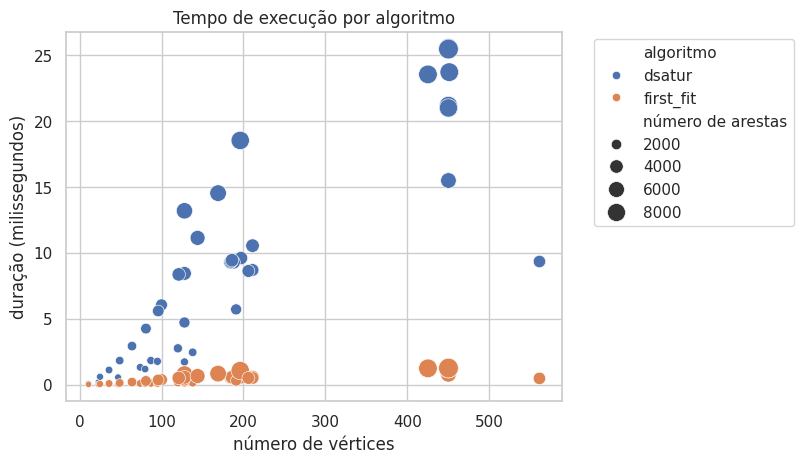

In [59]:


good_for_that_plot = df_resultado.set_index("algoritmo").drop(index="chromaticNumber")

selected_graphs = random.sample(list(good_for_that_plot['grafo'].unique()), 5)
#good_for_that_plot = good_for_that_plot[good_for_that_plot["graph_filename"].map(lambda k: k in selected_graphs)]
good_for_that_plot['duração (milissegundos)'] = good_for_that_plot['duração (segundos)'] * 1000
good_for_that_plot = good_for_that_plot[good_for_that_plot["número de arestas"] < 10000]

# Assuming df is your DataFrame with 3 numeric and 2 categorical columns
sns.scatterplot(
    data=good_for_that_plot, 
    x='número de vértices', 
    y='duração (milissegundos)', 
    size='número de arestas', 
    hue='algoritmo', 
    sizes=(20, 200)  # You can adjust sizes
)

plt.title('Tempo de execução por algoritmo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # To place the legend outside
plt.show()

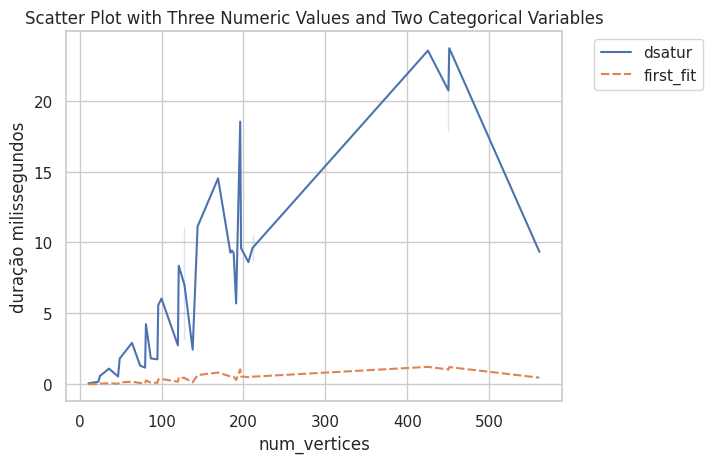

In [22]:
good_for_that_plot = df_results.set_index("algorithm_name").drop(index="chromaticNumber")

#selected_graphs = random.sample(list(good_for_that_plot['graph_filename'].unique()), 5)
#good_for_that_plot = good_for_that_plot[good_for_that_plot["graph_filename"].map(lambda k: k in selected_graphs)]
good_for_that_plot['duração milissegundos'] = good_for_that_plot['duration_sec'] * 1000
good_for_that_plot = good_for_that_plot.query("numEdges < 10000")

# Assuming df is your DataFrame with 3 numeric and 2 categorical columns
# Plot the responses for different events and regions
sns.lineplot(x="num_vertices", y="duração milissegundos",
             hue="algorithm_name", style="algorithm_name",
             data=good_for_that_plot)

plt.title('Scatter Plot with Three Numeric Values and Two Categorical Variables')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # To place the legend outside
plt.show()